In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Selecting features and target
X = data[['thalach', 'oldpeak']]
y = data['target']

# Converting target to binary for simplicity in classification
y = (y >= 0.5).astype(int)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing SVM classifiers with different kernels
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
models = [SVC(kernel=k, gamma='auto') for k in kernels]
accuracies = {}

# Training each model and calculating accuracy
for kernel, model in zip(kernels, models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[kernel] = accuracy_score(y_test, y_pred)

accuracies

{'linear': 0.6585365853658537,
 'rbf': 0.8341463414634146,
 'poly': 0.6731707317073171,
 'sigmoid': 0.5024390243902439}

C:\Users\Aravind Kaspe\Anaconda 3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Aravind Kaspe\Anaconda 3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Aravind Kaspe\Anaconda 3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Aravind Kaspe\Anaconda 3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


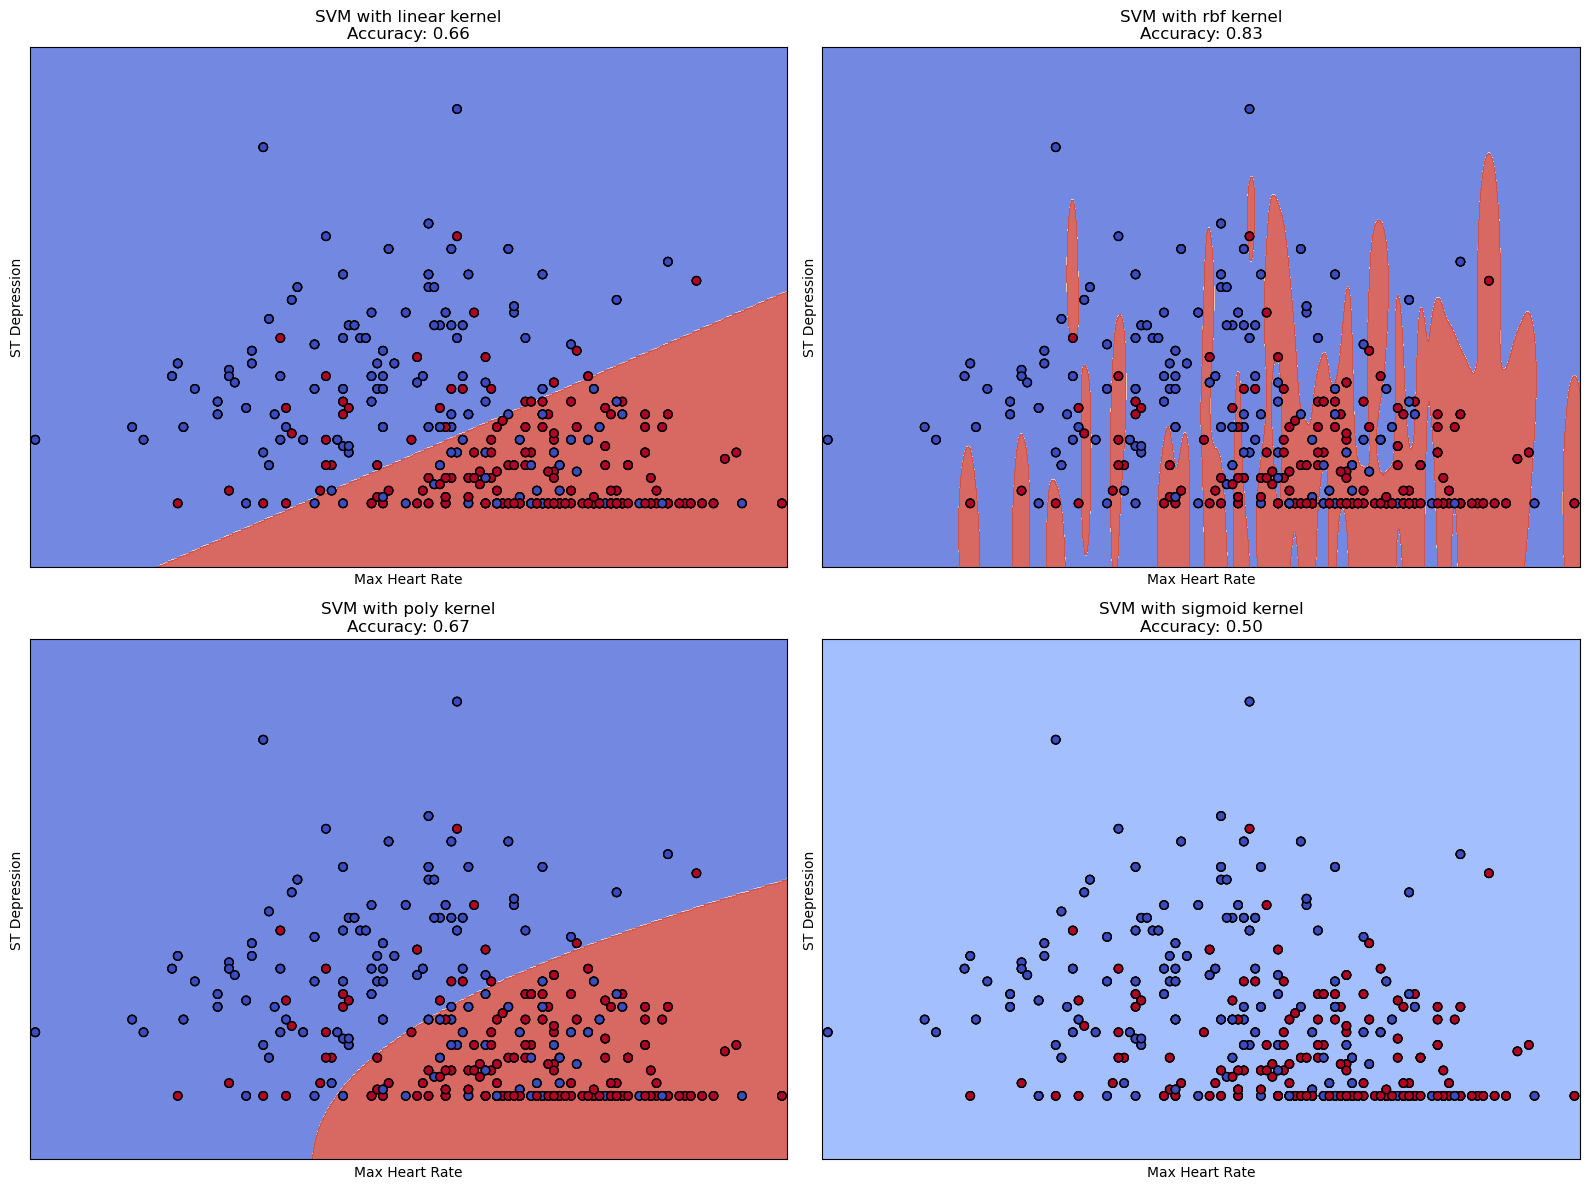

In [4]:
# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, title, subplot):
    # Plotting decision boundaries
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    subplot.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    subplot.set_xlabel('Max Heart Rate')
    subplot.set_ylabel('ST Depression')
    subplot.set_xlim(xx.min(), xx.max())
    subplot.set_ylim(yy.min(), yy.max())
    subplot.set_xticks(())
    subplot.set_yticks(())
    subplot.set_title(title)

# Converting to numpy for plotting
X_np = X.to_numpy()
y_np = y.to_numpy()

# Plot size
plt.figure(figsize=(16, 12))

for i, (kernel, model) in enumerate(zip(kernels, models), 1):
    subplot = plt.subplot(2, 2, i)
    plot_decision_boundaries(X_np, y_np, model, f'SVM with {kernel} kernel\nAccuracy: {accuracies[kernel]:.2f}', subplot)

plt.tight_layout()
plt.show()